This experiment is to check how to identify if the two given frames are similar or not.

## What qualifies as similar frames?
- Only cursor moved
- Scribbles on the frames
- Only slight changes of text (less than one sentence)

In [10]:
from video2pdf.ocr_approval.pixel_comparison import PixelComparison

In [11]:
'''old_frame_path = "data_archive_1/frame_1530.jpg"
new_frame_path = "data_archive_1/frame_2160.jpg"'''

# negatives 
old_frame_path = "data_archive_1/negatives/frame_3600.jpg"
new_frame_path = "data_archive_1/negatives/frame_5040.jpg"

In [3]:
import cv2

In [4]:
old_frame = cv2.imread(old_frame_path)
new_frame = cv2.imread(new_frame_path)

[ WARN:0@1.940] global loadsave.cpp:241 findDecoder imread_('data_archive_1/negatives/frame_3600.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.940] global loadsave.cpp:241 findDecoder imread_('data_archive_1/negatives/frame_5040.jpg'): can't open/read file: check file path/integrity


In [5]:
PixelComparison().permit_ocr(new_frame, old_frame)

True

In [6]:
import pandas as pd

In [7]:
# directory = "data_archive_1/dhmumc_frames"
directory = "data_archive_1/rnhlpj_peak_frames"
# directory = "data_archive_1/hfuitn_extracted_frames"

In [8]:
import os

In [9]:

all_frames = os.listdir(directory)
all_frames[:2]

FileNotFoundError: [Errno 2] No such file or directory: 'data_archive_1/rnhlpj_peak_frames'

In [ ]:
full_frames = [os.path.join("data_archive_1", directory, all_frames[i]) for i in range(len(all_frames))]
full_frames[:2]

In [ ]:
from video2pdf.utils.file_frame import FileFrame

In [ ]:
frames = FileFrame.get_sorted_frames(all_frames)
[print(frame.frame_path) for frame in frames[:2]]

In [ ]:
df = pd.DataFrame(columns = ["new_frame", "old_frame", "is_ocr_approved"])

In [ ]:
rows = []
for i in range(len(frames) - 1):
    old_frame_path = os.path.join(directory, frames[i].frame_path)
    new_frame_path = os.path.join(directory, frames[i + 1].frame_path)
    old_frame = cv2.imread(old_frame_path)
    new_frame = cv2.imread(new_frame_path)
    is_ocr_approved = PixelComparison().permit_ocr(new_frame, old_frame)
    rows.append({"new_frame": frames[i + 1].frame_path, "old_frame": frames[i].frame_path, "is_ocr_approved": is_ocr_approved})

df = pd.DataFrame(rows, columns=["new_frame", "old_frame", "is_ocr_approved"])


In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

# df_sample = df.sample(10, random_state=42)
df_sample = df

for index, row in df_sample.iterrows():
    new_frame_path = os.path.join(directory, row['new_frame'])
    old_frame_path = os.path.join(directory, row['old_frame'])
    
    new_frame = cv2.imread(new_frame_path)
    old_frame = cv2.imread(old_frame_path)
    
    is_ocr_approved = row['is_ocr_approved']
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"Old Frame: {row['old_frame']}")
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"New Frame: {row['new_frame']}\nAre Images Almost Equal: {not is_ocr_approved}")
    axes[1].axis('off')
    
    plt.show()

This should have been approved

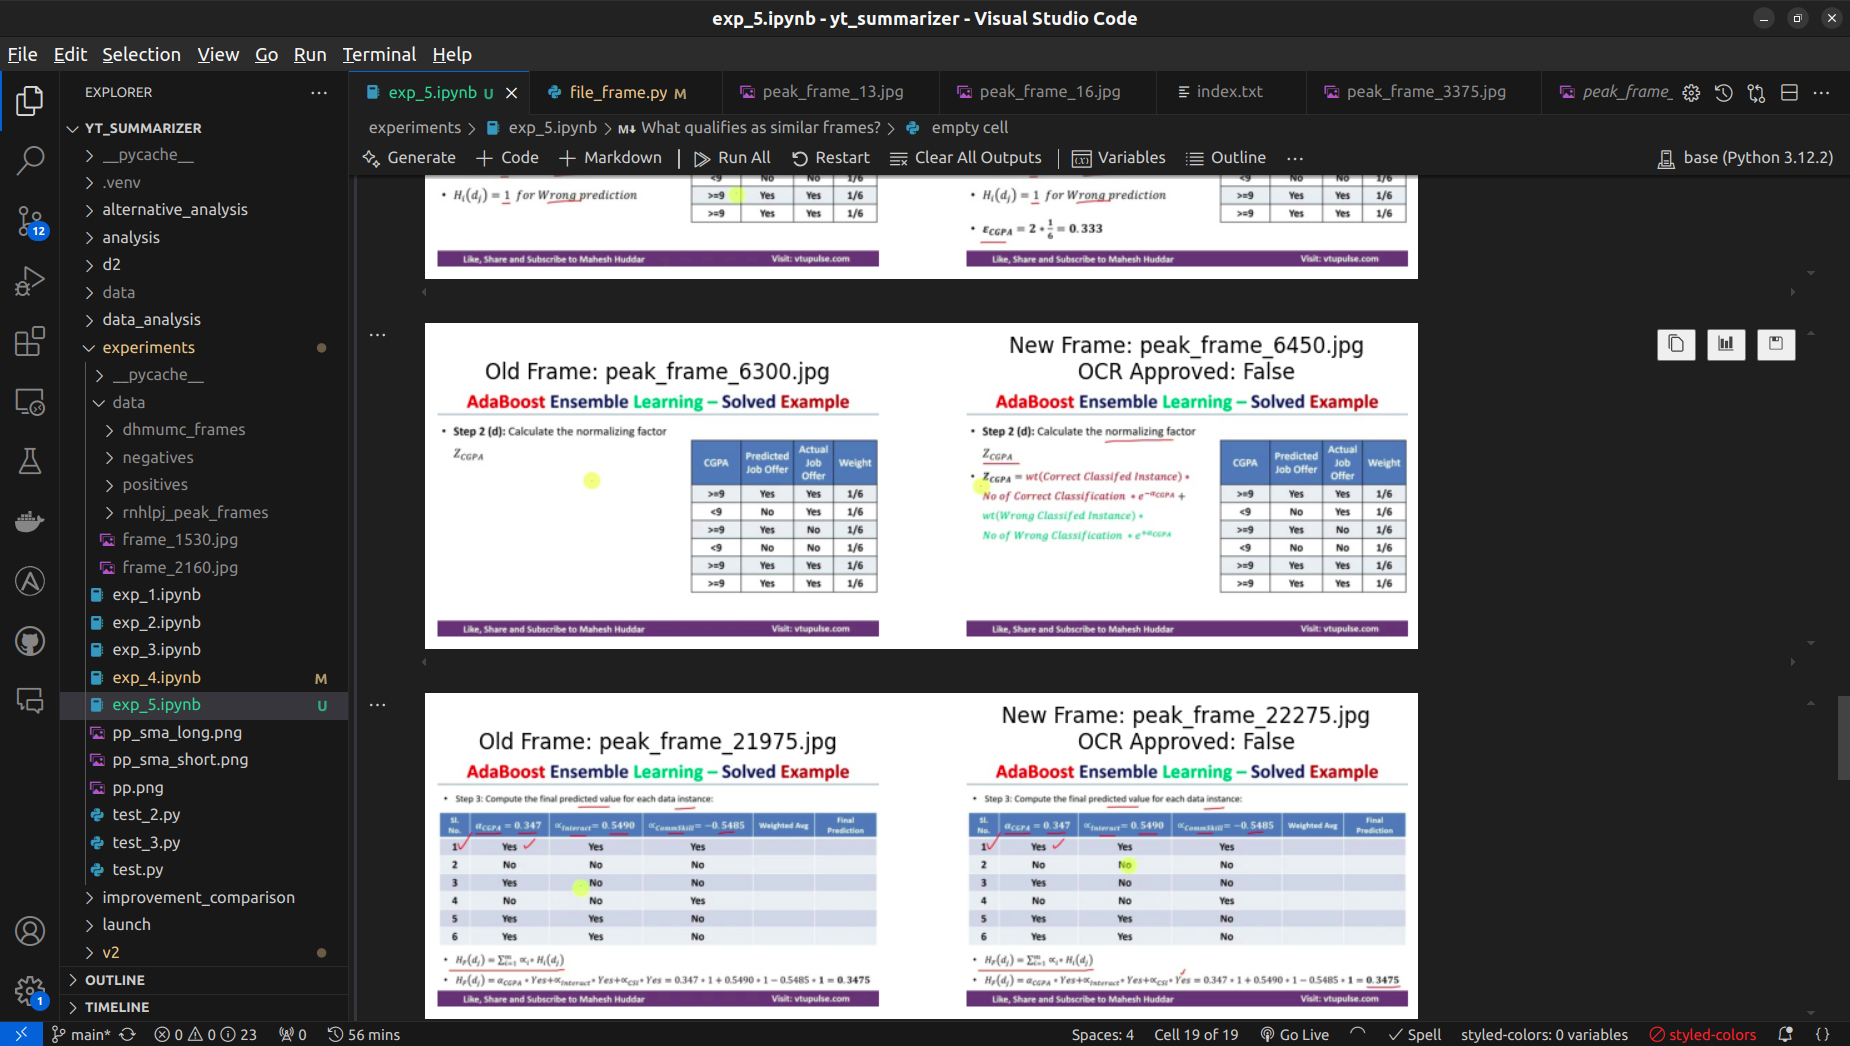

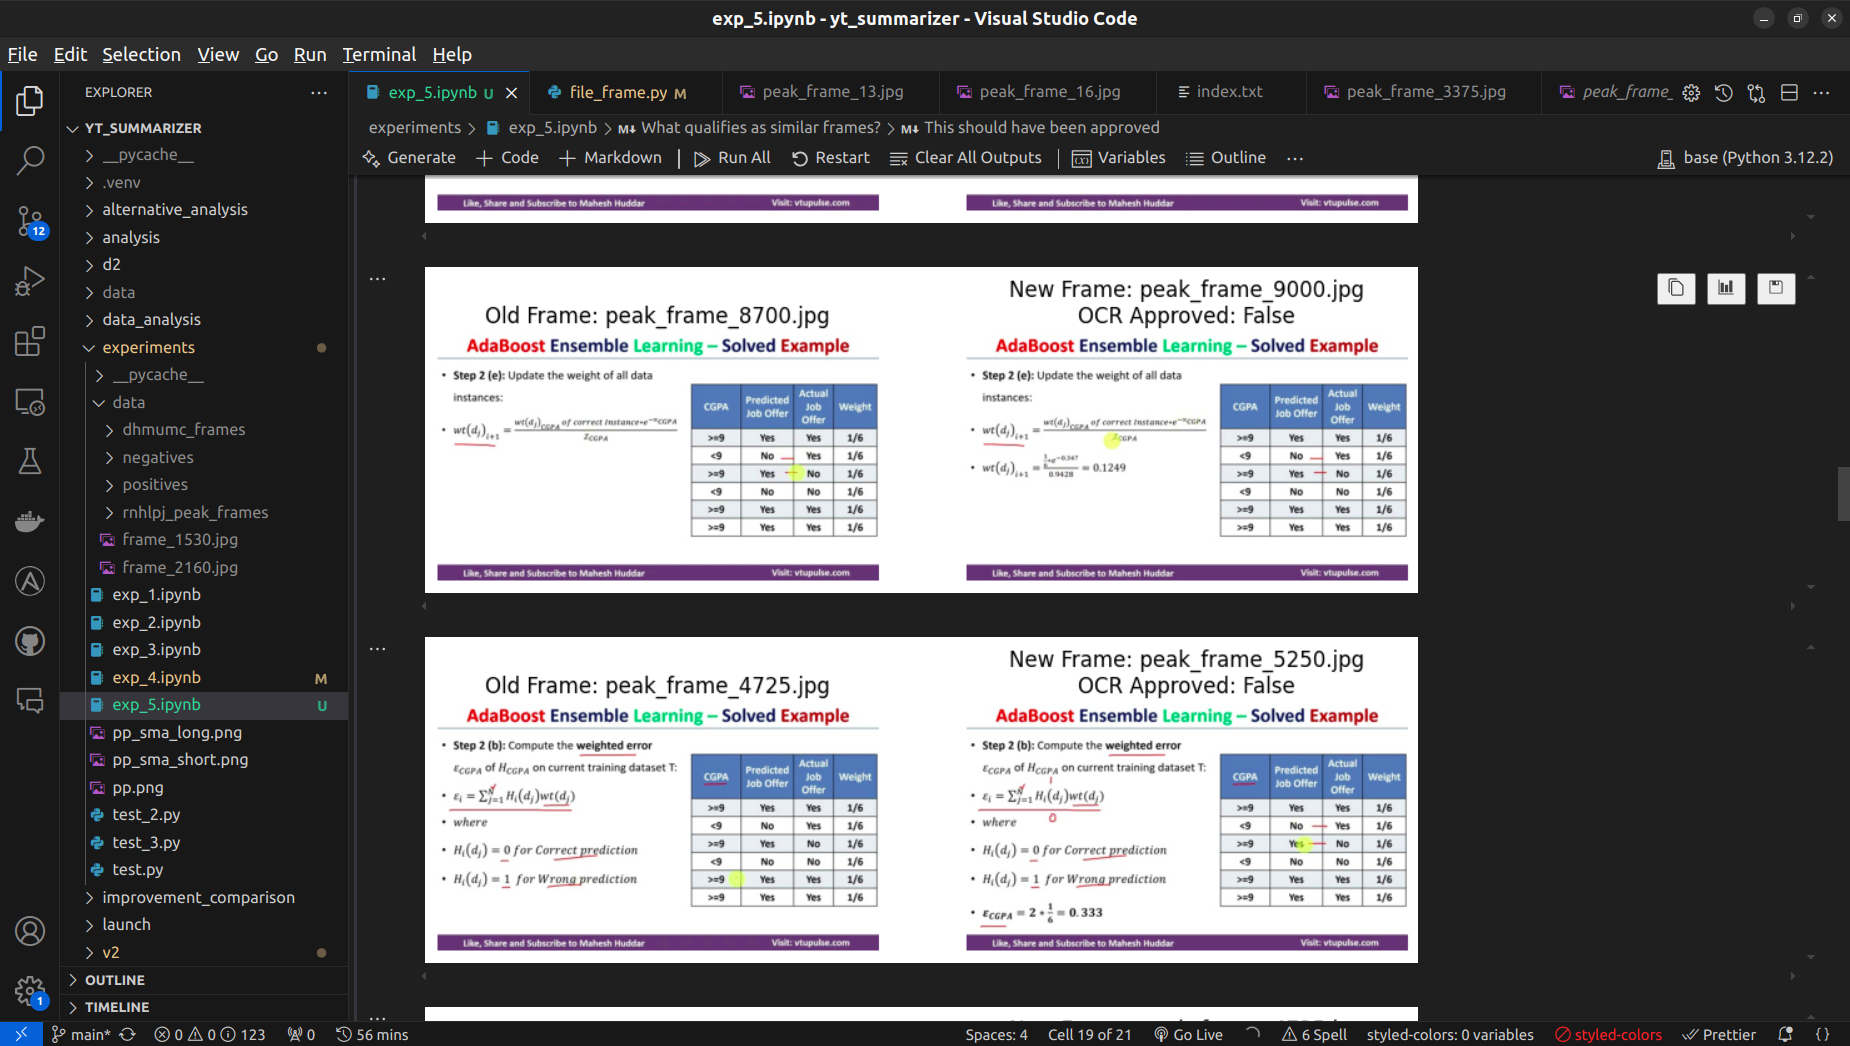